### Imports
In this project, we will use standard libraries for machine learning.

In [5]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)



import warnings
warnings.filterwarnings('ignore')    

### Data upload.
We first read the results of computational experiments.

In [6]:
# Read in data into dataframes 
result_133 = pd.read_excel('Datasets/1_Rasulov_133/result_133.xlsx')
result_53 = pd.read_excel('Datasets/2_53/result_53.xlsx')
result_103 = pd.read_excel('Datasets/3_103/result_103.xlsx')
result_150 = pd.read_excel('Datasets/4_Rasulov_150/result_150.xlsx')

### Table 4. The success ranking of 57 algorithms on 4 original drug datasets (best to worst, 1 to 57).

In [11]:
result_all = pd.concat([result_133.model,result_103.sort,result_53.sort,result_103.sort,result_150.sort],axis=1)
result_all.columns=['model','1','2','3','4']
result_all['Avg.'] = result_all.mean(axis=1)

### Table 5. The success ranking of 57 algorithms on 15 dimensionally reduced drug datasets (best to worst, 1 to 57).

In [15]:
result_reduced = pd.concat([result_133.model,result_103['sort.1'],result_53['sort.1'],result_103['sort.1'],result_150['sort.1']],axis=1)
result_reduced.columns=['model','1','2','3','4']
result_reduced['Avg.'] = result_reduced.mean(axis=1)

### Table 6. The averaged success rankings of the algorithms on the original datasets (best to worst, 1 to 57).



In [51]:
ranking_single = [result_all['Avg.'].iloc[i] for i in range(0,result_all.shape[0],3)]
index_single = [result_all['model'].iloc[i] for i in range(0,result_all.shape[0],3)]
ranking_bg = [result_all['Avg.'].iloc[i] for i in range(1,result_all.shape[0],3)]
ranking_ar = [result_all['Avg.'].iloc[i] for i in range(2,result_all.shape[0],3)]

ranking = pd.DataFrame({'BG' : ranking_bg,'AR': ranking_ar,'Single': ranking_single},index=index_single)
ranking['Avg'] = ranking.mean(axis=1)


### Table 7. The averaged success rankings of the algorithms on the dimensionally reduced datasets (best to worst, 1 to 36).

In [54]:
ranking_single = [result_reduced['Avg.'].iloc[i] for i in range(0,result_reduced.shape[0],3)]
index_single = [result_reduced['model'].iloc[i] for i in range(0,result_reduced.shape[0],3)]
ranking_bg = [result_reduced['Avg.'].iloc[i] for i in range(1,result_reduced.shape[0],3)]
ranking_ar = [result_reduced['Avg.'].iloc[i] for i in range(2,result_reduced.shape[0],3)]

ranking_reduced = pd.DataFrame({'BG' : ranking_bg,'AR': ranking_ar,'Single': ranking_single},index=index_single)
ranking_reduced['Avg'] = ranking_reduced.mean(axis=1)

In [55]:
with pd.ExcelWriter('output_out.xlsx') as writer:
    result_all.to_excel(writer, sheet_name='result_all')
    result_reduced.to_excel(writer, sheet_name='result_reduced')
    ranking.to_excel(writer, sheet_name='ranking')
    ranking_reduced.to_excel(writer, sheet_name='ranking_reduced')

### Figure  3.   The  hierarchical  clusters  of  the  algorithms  according  to  their  RMSE  values on  the  original  (left)  and dimensionally reduced (right) 15 datasets.

In [113]:
a=np.reshape(result_133.RMSE.values, (len(result_133.RMSE.values), 1))
b=np.reshape(result_53.RMSE.values, (len(result_53.RMSE.values), 1))
c=np.reshape(result_103.RMSE.values, (len(result_103.RMSE.values), 1))
d=np.reshape(result_150.RMSE.values, (len(result_150.RMSE.values), 1))
X = np.concatenate((a,b,c,d),axis=1)

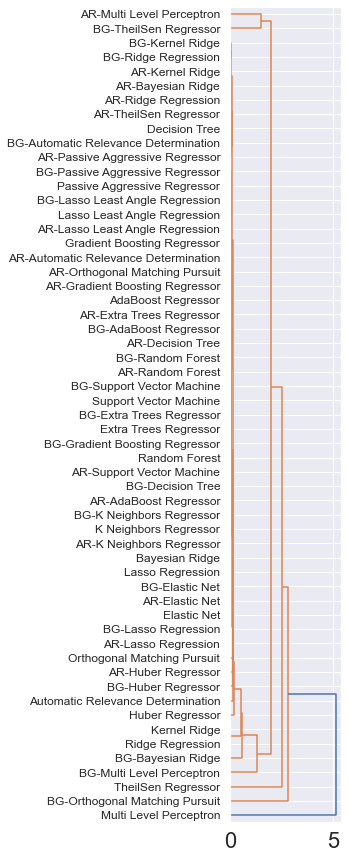

In [122]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = result_103.model.values

plt.figure(figsize=(5, 15))
dendrogram(linked,leaf_font_size=12. , show_contracted=True,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [123]:
a=np.reshape(result_133['RMSE.1'].values, (len(result_133['RMSE.1'].values), 1))
b=np.reshape(result_53['RMSE.1'].values, (len(result_53['RMSE.1'].values), 1))
c=np.reshape(result_103['RMSE.1'].values, (len(result_103['RMSE.1'].values), 1))
d=np.reshape(result_150['RMSE.1'].values, (len(result_150['RMSE.1'].values), 1))
X_reduced = np.concatenate((a,b,c,d),axis=1)

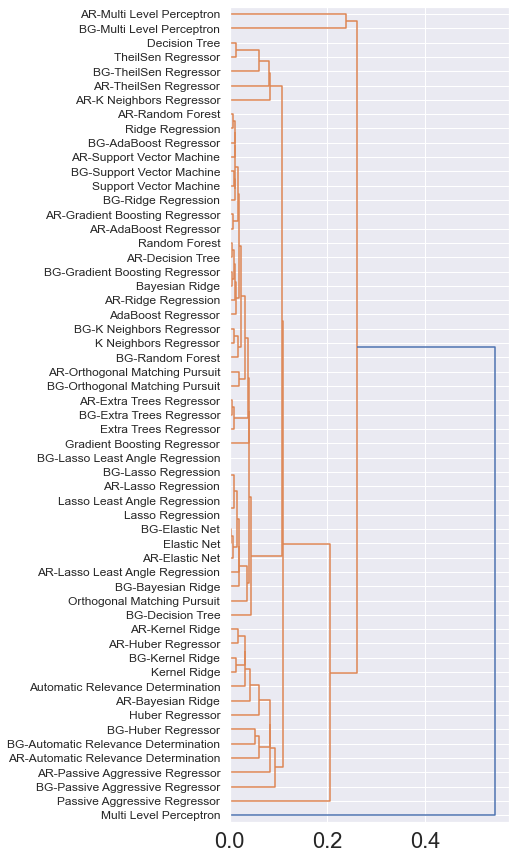

In [124]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X_reduced, 'single')

labelList = result_103.model.values

plt.figure(figsize=(5, 15))
dendrogram(linked,leaf_font_size=12. , show_contracted=True,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

### Figure 4. The hierarchical clusters of the original (left) and dimensionally reduced (right) 15 datasets according to their RMSE values obtained with 36 algorithms. In the figures, the dataset names, the number of features, and the samples are given.

In [125]:
X_datasets = np.rot90(X)

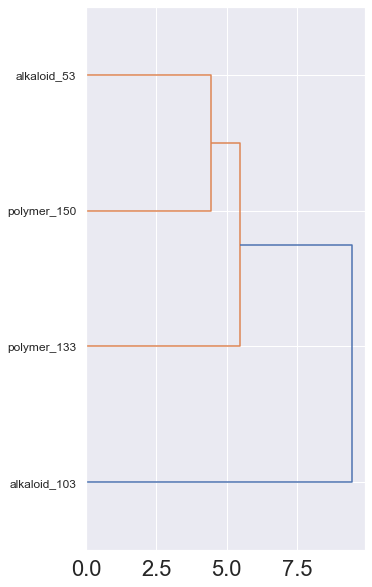

In [126]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X_datasets, 'single')

labelList = ['polymer_150','alkaloid_103','alkaloid_53','polymer_133']

plt.figure(figsize=(5, 10))
dendrogram(linked,leaf_font_size=12. , show_contracted=True,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [127]:
X_datasets_red = np.rot90(X_reduced)

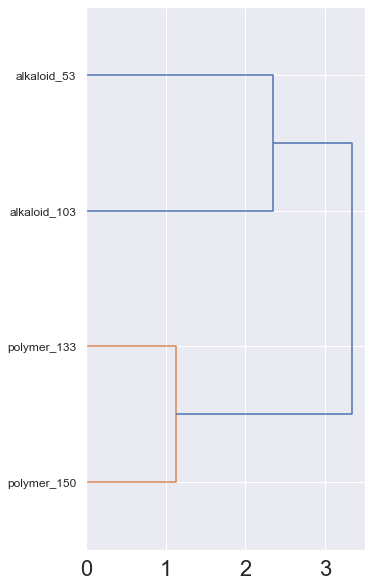

In [129]:
linked = linkage(X_datasets_red, 'single')

labelList = ['polymer_150','alkaloid_103','alkaloid_53','polymer_133']

plt.figure(figsize=(5, 10))
dendrogram(linked,leaf_font_size=12. , show_contracted=True,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()